# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nuhaa Salsabila Shidqiyyah
- **Email:** nuhaa.22045@mhs.unesa.ac.id
- **ID Dicoding:** nuhaasalsabila

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda per tahun?
- Bagaimana perbedaan penyewaan sepeda pada hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [514]:
pip install streamlit

In [515]:
import numpy as np #untuk menghitung komputasi
import pandas as pd #untuk manipulasi dan analisis data
import matplotlib.pyplot as plt #untuk visualisasi
import seaborn as sns #sama untuk visualisasi

## Data Wrangling

### Gathering Data

In [516]:
hari = pd.read_csv("day.csv")
hari.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [517]:
jam = pd.read_csv("hour.csv")
jam.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada data 1 dapat dilihat datanya yang kolomnya terdiri dari instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt
- Pada data 2 instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt
Kesimpulan Sementara : pada data 2 ada tambahan kolom hour

### Assessing Data

CSV DAY

In [518]:
hari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kolom yang tidak sesuai, seperti dteday harusnya memiliki tipe datetime karena berisi tanggal

In [519]:
hari.isna().sum() #tidak memiliki missing value

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [520]:
print ("Jumlah duplikasi data pada jam.csv adalah :", hari.duplicated().sum()) #tidak memiliki duplikat

Jumlah duplikasi data pada jam.csv adalah : 0


In [521]:
hari.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [522]:
hari.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dataset menunjukkan bahwa penyewaan sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur. Sebagian besar penyewa adalah pengguna terdaftar dari total penyewa yang ada. Selain itu, suhu yang lebih baik dan kelembapan yang sedang juga berkontribusi pada peningkatan jumlah penyewaan sepeda. Maka dari itu, penyewaan sepeda dipengaruhi oleh hari kerja dan kondisi cuaca yang baik.

CSV JAM

In [523]:
jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


sama seperti data day.csv, kolom dtedat bukan bertipe date time.

In [524]:
jam.isna().sum() #no missing value bagus

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [525]:
print ("Jumlah duplikasi data pada jam.csv adalah :", jam.duplicated().sum()) #tidak da uplikat juga

Jumlah duplikasi data pada jam.csv adalah : 0


In [526]:
jam.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [527]:
jam.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada data ini menunjukkan bahwa penyewaan sepeda lebih tinggi pada hari kerja dan pada jam tertentu, dengan mayoritas pengguna terdaftar. Selain itu, kondisi cuaca yang baik, terutama suhu dan kelembapan, mempengaruhi jumlah penyewaan.

**Insight:**
- beberapa data tidak sesuai dan harus diganti tipe datanya
- data yang cukup bersih karena tidak memiliki baris kosong dan tidak ada duplikasi data

### Cleaning Data

In [528]:
#merubah tipe data dteday pada var hari
hari['dteday'] = pd.to_datetime(hari['dteday'])
hari.info()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [529]:
#merubah tipe data dteday pada var hari
jam['dteday'] = pd.to_datetime(jam['dteday'])
jam.info()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Beberapa kolom sudah diubah sesuai dengan tipe datanya

## Exploratory Data Analysis (EDA)

In [531]:
#DROP KOLOM YANG TIDKA DIBUTUHKAN
hari.drop(['instant', 'dteday', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'], axis=1, inplace=True)
hari.head()

,season,yr,cnt
0,1,0,985
1,1,0,801
2,1,0,1349
3,1,0,1562
4,1,0,1600


In [532]:
#MENGGANTI NAMA KOLOM AGAR MUDAH DIBACA
hari.rename(columns={
    'yr' : 'year',
    'cnt' : 'total'
}, inplace=True)
hari.head()

,season,year,total
0,1,0,985
1,1,0,801
2,1,0,1349
3,1,0,1562
4,1,0,1600


In [533]:
#MENGUBAH LABEL SEASON DENGAN STRING SESUAI DENGAN MUSIM
hari.loc[hari['season'] == 1, 'season'] = 'Winter'
hari.loc[hari['season'] == 2, 'season'] = 'Spring'
hari.loc[hari['season'] == 3, 'season'] = 'Summer'
hari.loc[hari['season'] == 4, 'season'] = 'Fall'
hari.head()

<ipython-input-533-b9cb43f71882>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Winter' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hari.loc[hari['season'] == 1, 'season'] = 'Winter'


,season,year,total
0,Winter,0,985
1,Winter,0,801
2,Winter,0,1349
3,Winter,0,1562
4,Winter,0,1600


JAM.CSV

In [534]:
#DROP KOLOM
jam.drop(['instant', 'dteday', 'season', 'yr', 'hr','holiday', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'], axis=1, inplace=True)
jam.head()

,mnth,workingday,cnt
0,1,0,16
1,1,0,40
2,1,0,32
3,1,0,13
4,1,0,1


In [535]:
#MENGGANTI NAMA KOLOM AGAR MUDAH DIBACA
jam.rename(columns={
    'mnth' : 'month',
    'yr' : 'year',
    'cnt' : 'total'
}, inplace=True)
jam.head()

,month,workingday,total
0,1,0,16
1,1,0,40
2,1,0,32
3,1,0,13
4,1,0,1


## Insight :
- Pada day.csv beberapa kolom tidak dibutuhkan mengingat tujuan yang dicari hanya pengaruh musim terhadap penyewaan. Maka kolom yang dipakai adalah season sebagai musim, year karena melihat hasil per tahun, dan total dari penyewa sepeda
- Pada hour.csv juga menghapus beberapa kolom karena hanya ingin menghitung jumlah penyewa sepeda pada hati kerja dan tidak. Jadi kolom yang dipakai month karena menghitung per bulan, working day karena hari kerja dan lainnya tidak dihitung, begitupun kolom total digunakan untuk menghitung jumlah penyewa.
- pada dua csv ini mengganti nama kolom agar tida menimbulkan bias dan biar jelas.

### Explore

day

In [536]:
hari.groupby(by=['year', 'season']).agg({
    'total': ['sum', 'max', 'min', 'mean']
})

total                         
                sum   max   min         mean
year season                                 
0    Fall    326137  5511   627  3664.460674
     Spring  347316  5805   795  3775.173913
     Summer  419650  6043  1115  4464.361702
     Winter  150000  3239   431  1666.666667
1    Fall    515476  8555    22  5791.865169
     Spring  571273  8362  1027  6209.489130
     Summer  641479  8714  4073  6824.244681
     Winter  321348  7836   441  3531.296703

In [537]:
result_hari = hari.groupby(['year', 'season'])['total'].sum().reset_index()

jam

In [538]:
jam.groupby(by=['month', 'workingday']).agg({
    'total': ['sum', 'max', 'min', 'mean']
})

total                     
                     sum  max min        mean
month workingday                             
1     0            41017  512   1   78.576628
      1            93916  559   1  103.545755
2     0            40348  499   1   94.271028
      1           111004  610   1  121.581599
3     0            61857  690   1  153.111386
      1           167063  957   1  156.279701
4     0            89259  712   1  185.956250
      1           179835  822   1  187.915361
5     0           105851  730   2  232.129386
      1           225835  873   1  218.832364
6     0           104617  702   5  256.414216
      1           241725  900   1  234.229651
7     0           113518  632   1  225.234127
      1           231430  913   2  235.193089
8     0            79415  654   1  214.056604
      1           271779  941   1  246.176630
9     0           122364  783   1  254.925000
      1           223627  977   1  233.675026
10    0           102215  760   1  212.947917
      1           220137  963   1  226.711637
11    0            80870  724   2  168.479167
      1           173961  729   1  181.777429
12    0            58938  547   1  117.640719
      1           152098  759   1  154.885947

In [539]:
result_jam = jam.groupby(['month', 'workingday'])['total'].sum().reset_index()

**Insight:**
- Mengelompokkan tahun dan musim yang terjadi dan menjumlahkan total jumlah penyewa dan disimpan pada variabel result_hari. Sehingga pada proses visualisasi hanya memanggil nama variabel begitupun pada hour.csv.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda per tahun?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

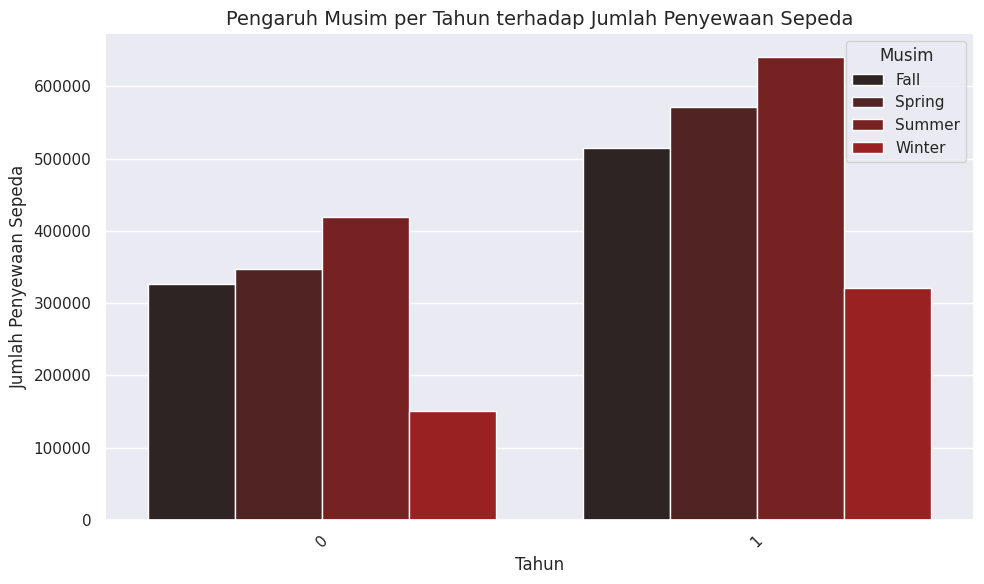

In [540]:
# Membuat plot menggunakan seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=result_hari, x='year', y='total', hue='season')

# Menambahkan judul dan label
plt.title('Pengaruh Musim per Tahun terhadap Jumlah Penyewaan Sepeda', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.legend(title='Musim')
plt.xticks(rotation=45)

# Menampilkan plot
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana perbedaan penyewaan sepeda pada hari kerja dan hari libur?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


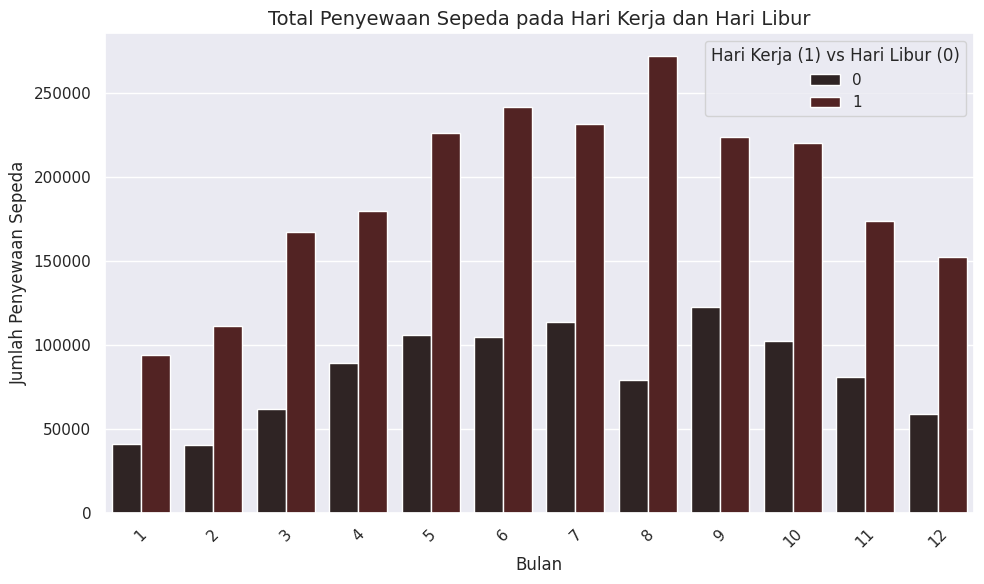

In [543]:
# Membuat plot menggunakan seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=result_jam, x='month', y='total', hue='workingday')

# Menambahkan judul dan label
plt.title('Total Penyewaan Sepeda pada Hari Kerja dan Hari Libur', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.legend(title='Hari Kerja (1) vs Hari Libur (0)')
plt.xticks(rotation=45)

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight:**
- number 1

The effect of seasonality on the number of bicycle rentals shows a different trend between 2011 and 2012. In winter (January-February), the number of rentals is lowest due to cold weather, but 2012 showed an increase over 2011. Although winter conditions are less than ideal for cycling, there are signs of growing interest in the second year. Spring (March-May) saw an increase in rentals, especially in May when the weather started to improve. 2012 saw a higher number of rentals, indicating a growth in popularity of bike sharing compared to 2011.

In summer (June-August), rentals peak in August, with a significant increase in 2012. This may be due to the increased popularity of the service, more outdoor events, and better accessibility, rather than too-hot temperatures discouraging cycling. In **fall** (September-November), rentals start to decline from the summer peak, but numbers are still quite high. 2012 continued to show larger numbers than 2011, with cooler weather that was still comfortable for cycling.

Overall, the number of bicycle rentals increased from 2011 to 2012 in all seasons, with summer being the highest peak, likely due to increased popularity, better service accessibility, and more favorable weather.

- number 2

Based on the bicycle rental comparison chart between weekdays and holidays, it can be seen that holiday rentals tend to be much higher than weekdays, especially in the spring to summer months. Peak holiday bike rentals occur in August, with over 250,000 bikes rented, far exceeding the number of weekday rentals.
During the spring to summer months (March to August), holiday bike rentals increase sharply, possibly because more people take advantage of the nice weather for leisure cycling. In contrast, weekday rentals are more stable and relatively lower, although there are moderate increases in the summer months such as July and August.
In the fall and winter months (September to February), bicycle rentals decrease on both weekdays and holidays, but holiday rentals remain higher. The difference in rentals between weekdays and holidays is most pronounced in summer, when people are more likely to cycle on holidays for recreation or outdoor activities.

Overall, holidays are clearly more popular for bike rentals, especially in seasons with favorable weather, while weekday rentals remain stable but lower.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
The number of bicycle rentals increased from 2011 to 2012 in all seasons. Although winter had the lowest number of rentals, there was an increase in 2012 indicating growing interest. Spring also recorded an increase, especially in May. In summer, rentals peak in August, with a significant spike in 2012 due to the increasing popularity and accessibility of the service. Meanwhile, the fall season continued to show high numbers despite a decline from the summer peak. Overall, the trend shows growth in bike rentals thanks to more favorable weather and better services.
- Conclution pertanyaan 2
The analysis shows that bicycle rentals on holidays are much higher than those on weekdays, especially from spring to summer. The peak of bicycle rentals occurs in August, with more than 250,000 bicycles rented on holidays. During March to August, holiday bike rentals increase sharply, possibly because the good weather encourages people to cycle. In contrast, weekday bicycle rentals tend to be stable and lower, although there is a moderate increase in July and August. In the fall and winter, bicycle rentals decline on both types of days, but rentals on holidays remain higher. Overall, holidays are a more popular time to rent a bicycle, especially in seasons with favorable weather.